<a href="https://colab.research.google.com/github/Gabrinetio/Data_Science/blob/main/Analise_de_Sentimentos_em_Reviews_de_APPs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Instalação das bibliotecas necessárias para a análise
!pip install pandas nltk

# Importação das bibliotecas
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string

# Download de recursos do NLTK (necessário na primeira execução)
nltk.download('stopwords')
nltk.download('punkt')

print("Ambiente configurado e bibliotecas prontas!")

# --- Exemplo de Carregamento de Dados ---
# Para este exemplo, vamos criar um DataFrame simples.
# O ideal é que você substitua esta parte pela importação do seu conjunto de dados.
data = {'review': ['Amei o app, muito funcional!', 'O app trava muito, horrível.', 'Poderia ter mais funcionalidades.', 'Gostei da nova atualização.', 'Não consigo fazer login.'],
        'rating': [5, 1, 3, 4, 2]}
df = pd.DataFrame(data)

print("\n--- DataFrame de Exemplo Carregado ---")
print(df.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Ambiente configurado e bibliotecas prontas!

--- DataFrame de Exemplo Carregado ---
                              review  rating
0       Amei o app, muito funcional!       5
1       O app trava muito, horrível.       1
2  Poderia ter mais funcionalidades.       3
3        Gostei da nova atualização.       4
4           Não consigo fazer login.       2


In [2]:
import pandas as pd
import numpy as np
import nltk
import string

# --- SETUP DO NLTK ---
# Garantir que todos os pacotes necessários estão baixados.
# Adicionamos 'punkt_tab' que estava faltando.
nltk.download('punkt')
nltk.download('punkt_tab') # <-- Adicionado para corrigir o erro
nltk.download('stopwords')

# 1. Carregar os Dados usando os links permanentes
url_apps = 'https://raw.githubusercontent.com/Gabrinetio/Data_Science/main/data/apps.csv'
url_reviews = 'https://raw.githubusercontent.com/Gabrinetio/Data_Science/main/data/user_reviews.csv'

df_apps = pd.read_csv(url_apps)
df_reviews = pd.read_csv(url_reviews)

# 2. Limpeza e Junção (Merge)
df_apps = df_apps[df_apps['Category'] != '1.9'] # Limpeza robusta
df_completo = pd.merge(df_reviews, df_apps, on='App')
df_completo.dropna(subset=['Translated_Review'], inplace=True)

print("✅ DataFrame carregado e limpo com sucesso!")

# --- ETAPA DE PRÉ-PROCESSAMENTO DE TEXTO ---

# 3. Definir a função de pré-processamento
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Converter para minúsculas
    text = text.lower()
    # Remover pontuação
    text = "".join([char for char in text if char not in string.punctuation])
    # Tokenização (dividir em palavras)
    tokens = nltk.word_tokenize(text)
    # Remover stopwords
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# 4. Aplicar a função na coluna de reviews
print("\nIniciando pré-processamento do texto...")
df_completo['Review_Processed'] = df_completo['Translated_Review'].apply(preprocess_text)
print("✅ Pré-processamento concluído!")

# 5. Visualizar o resultado
print("\n--- Amostra do DataFrame com a nova coluna processada ---")
print(df_completo[['Translated_Review', 'Review_Processed']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


✅ DataFrame carregado e limpo com sucesso!

Iniciando pré-processamento do texto...
✅ Pré-processamento concluído!

--- Amostra do DataFrame com a nova coluna processada ---
                                   Translated_Review  \
0  I like eat delicious food. That's I'm cooking ...   
1    This help eating healthy exercise regular basis   
3         Works great especially going grocery store   
4                                       Best idea us   
5                                           Best way   

                                    Review_Processed  
0  [like, eat, delicious, food, thats, im, cookin...  
1  [help, eating, healthy, exercise, regular, basis]  
3  [works, great, especially, going, grocery, store]  
4                                   [best, idea, us]  
5                                        [best, way]  


Iniciando a Análise Exploratória de Dados (AED)...


/tmp/ipython-input-2109239923.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequência', y='Palavra', data=df_most_common, palette='viridis')


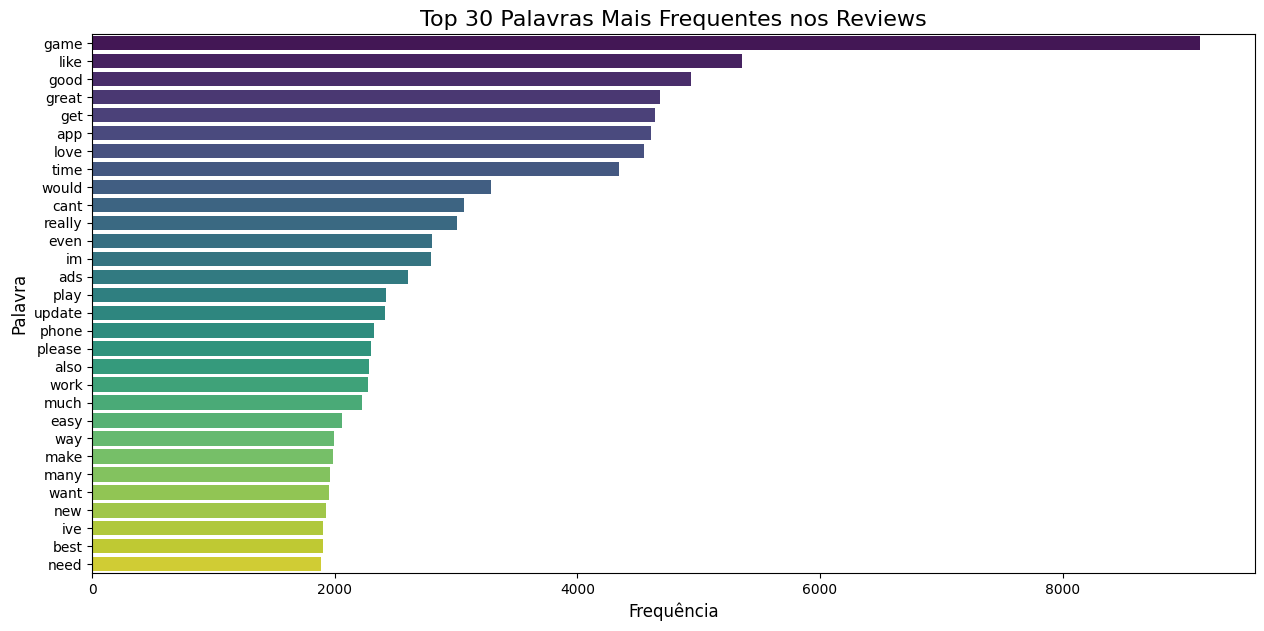

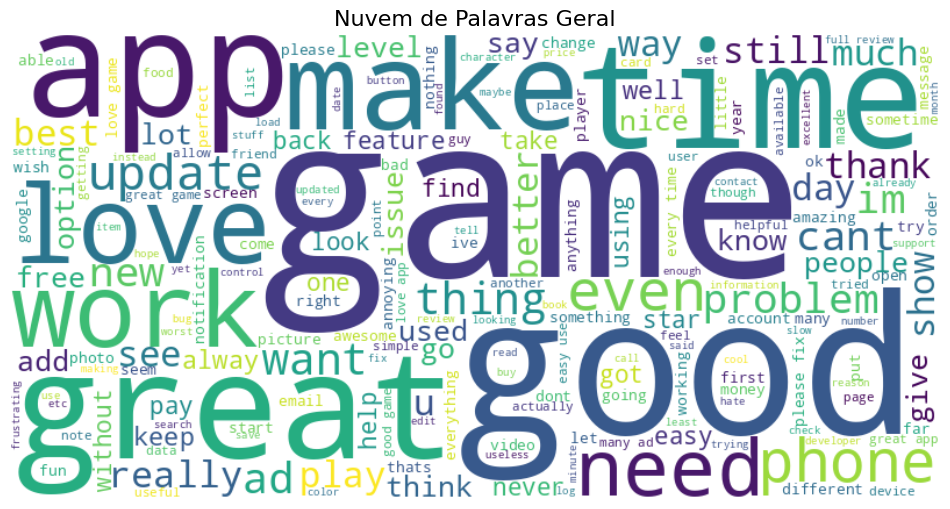

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

print("Iniciando a Análise Exploratória de Dados (AED)...")

# --- 1. Análise de Frequência das Palavras ---

# Juntar todas as listas de palavras em uma única lista gigante
all_words = [word for tokens in df_completo['Review_Processed'] for word in tokens]

# Contar a frequência de cada palavra
word_counts = Counter(all_words)

# Pegar as 30 palavras mais comuns
most_common_words = word_counts.most_common(30)

# Criar um DataFrame para facilitar a visualização
df_most_common = pd.DataFrame(most_common_words, columns=['Palavra', 'Frequência'])

# Criar o gráfico de barras
plt.figure(figsize=(15, 7))
sns.barplot(x='Frequência', y='Palavra', data=df_most_common, palette='viridis')
plt.title('Top 30 Palavras Mais Frequentes nos Reviews', fontsize=16)
plt.xlabel('Frequência', fontsize=12)
plt.ylabel('Palavra', fontsize=12)
plt.show()


# --- 2. Nuvem de Palavras (Word Cloud) ---

# Juntar todas as palavras em um único texto novamente
text_for_wordcloud = " ".join(all_words)

# Gerar a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_for_wordcloud)

# Exibir a imagem gerada
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # Remover os eixos x e y
plt.title('Nuvem de Palavras Geral', fontsize=16)
plt.show()

Iniciando a análise de frequência por sentimento...


/tmp/ipython-input-996019426.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequência', y='Palavra', data=df_most_common_pos, ax=axes[0], palette='Greens_r')
/tmp/ipython-input-996019426.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequência', y='Palavra', data=df_most_common_neg, ax=axes[1], palette='Reds_r')


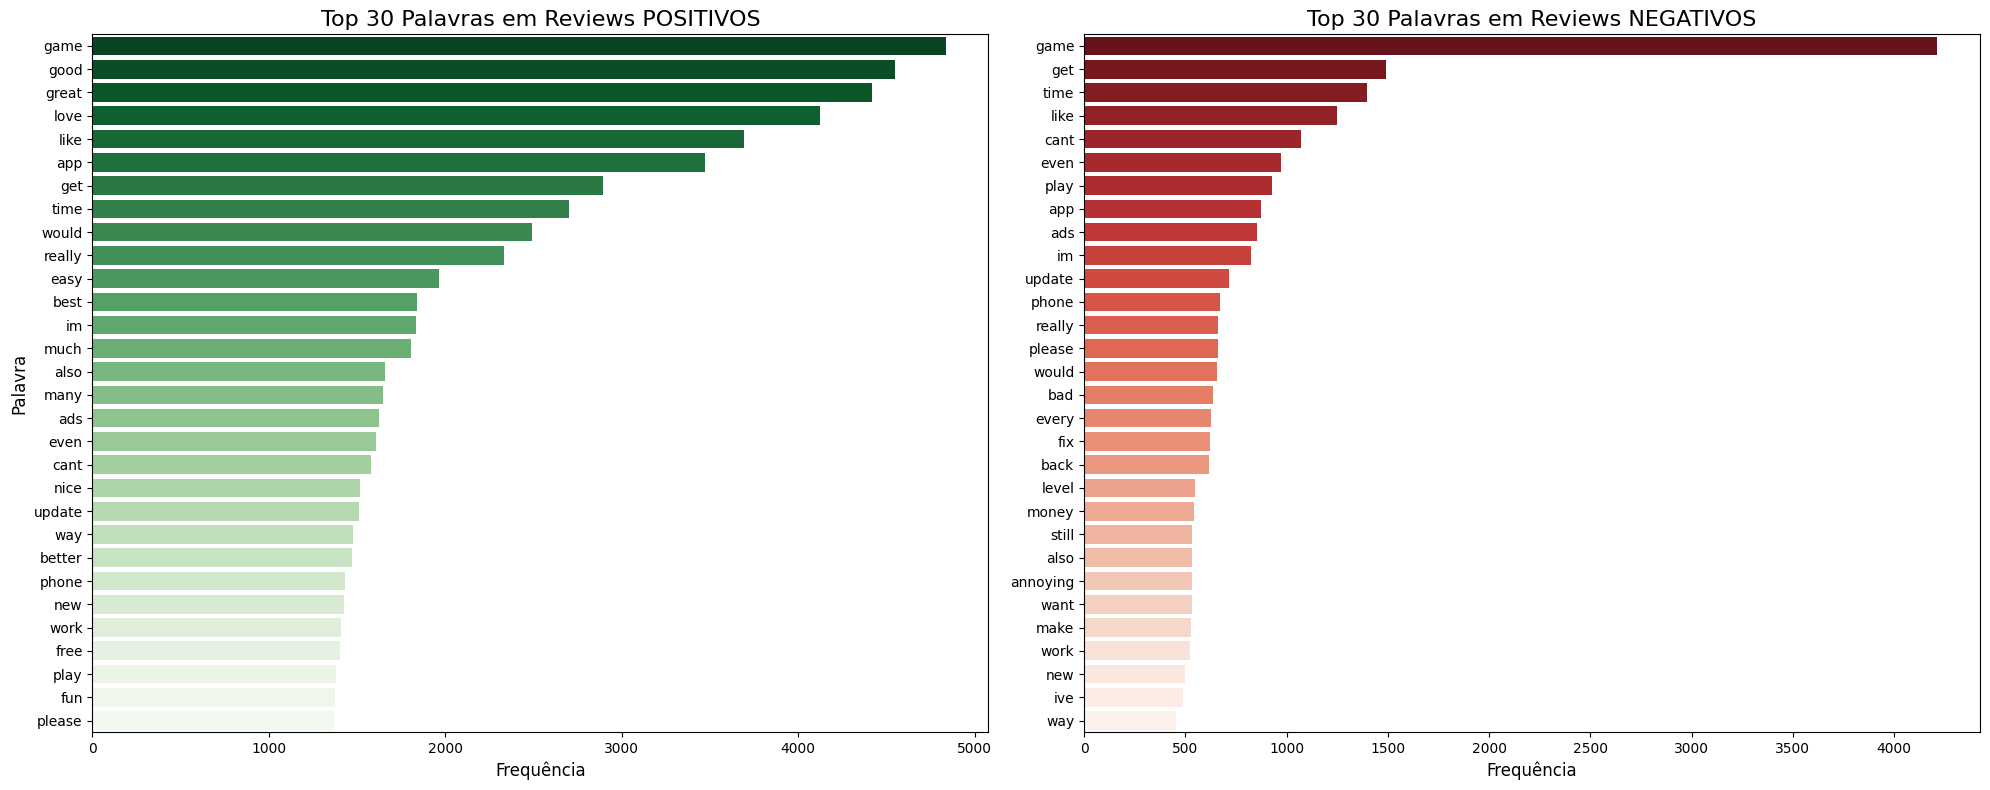

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

print("Iniciando a análise de frequência por sentimento...")

# --- 1. Filtrar o DataFrame por sentimento ---
df_positive = df_completo[df_completo['Sentiment'] == 'Positive']
df_negative = df_completo[df_completo['Sentiment'] == 'Negative']

# --- 2. Contar palavras para cada sentimento ---

# Palavras positivas
all_words_positive = [word for tokens in df_positive['Review_Processed'] for word in tokens]
word_counts_positive = Counter(all_words_positive)
most_common_positive = word_counts_positive.most_common(30)
df_most_common_pos = pd.DataFrame(most_common_positive, columns=['Palavra', 'Frequência'])

# Palavras negativas
all_words_negative = [word for tokens in df_negative['Review_Processed'] for word in tokens]
word_counts_negative = Counter(all_words_negative)
most_common_negative = word_counts_negative.most_common(30)
df_most_common_neg = pd.DataFrame(most_common_negative, columns=['Palavra', 'Frequência'])


# --- 3. Visualizar os resultados lado a lado ---

fig, axes = plt.subplots(1, 2, figsize=(20, 8)) # 1 linha, 2 colunas

# Gráfico para reviews positivos
sns.barplot(x='Frequência', y='Palavra', data=df_most_common_pos, ax=axes[0], palette='Greens_r')
axes[0].set_title('Top 30 Palavras em Reviews POSITIVOS', fontsize=16)
axes[0].set_xlabel('Frequência', fontsize=12)
axes[0].set_ylabel('Palavra', fontsize=12)

# Gráfico para reviews negativos
sns.barplot(x='Frequência', y='Palavra', data=df_most_common_neg, ax=axes[1], palette='Reds_r')
axes[1].set_title('Top 30 Palavras em Reviews NEGATIVOS', fontsize=16)
axes[1].set_xlabel('Frequência', fontsize=12)
axes[1].set_ylabel('') # Remover o label y para não poluir

plt.tight_layout() # Ajusta o espaçamento para não sobrepor os títulos
plt.show()

Iniciando a análise de bigramas por sentimento...


/tmp/ipython-input-2454650688.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequência', y='Bigrama', data=df_bigrams_pos, ax=axes[0], palette='Greens_r')
/tmp/ipython-input-2454650688.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequência', y='Bigrama', data=df_bigrams_neg, ax=axes[1], palette='Reds_r')


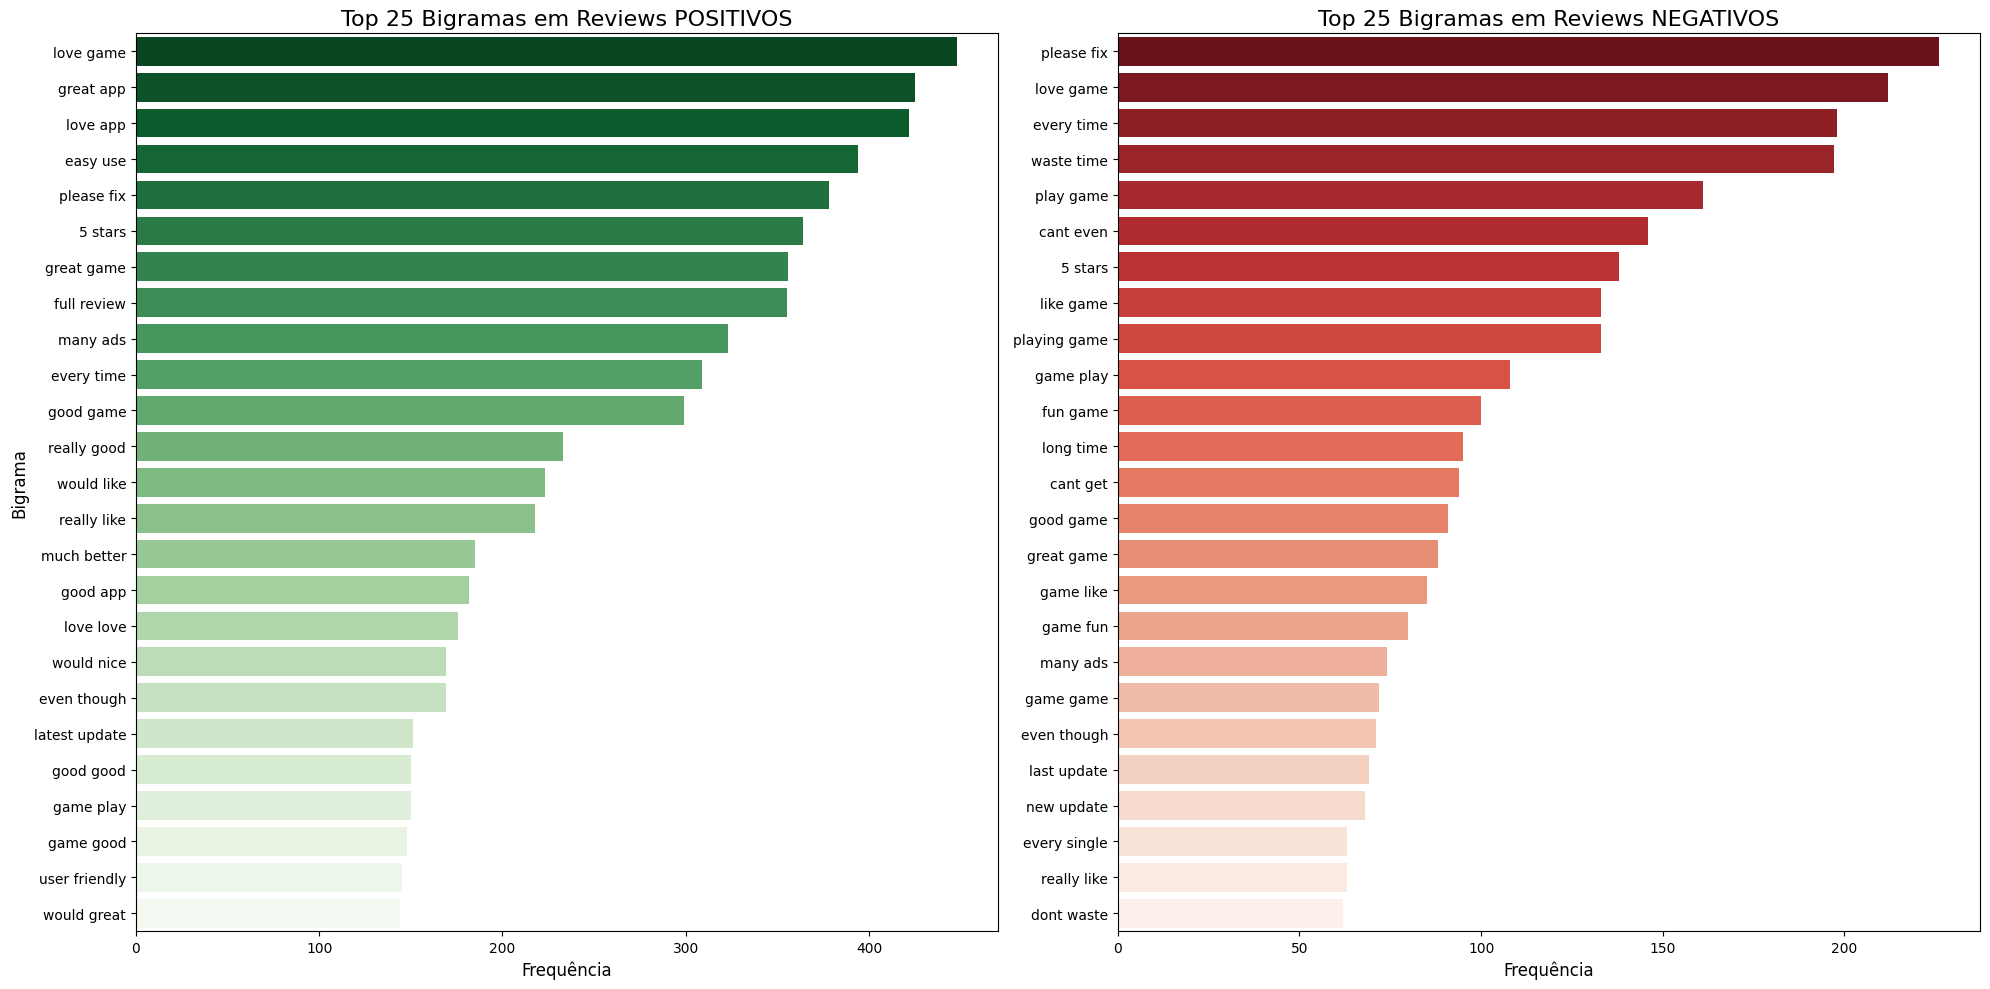

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk

print("Iniciando a análise de bigramas por sentimento...")

# --- 1. Função para encontrar os bigramas mais comuns ---
def get_most_common_bigrams(df_column, top_n=25):
    # Usar a função bigrams do NLTK em cada lista de palavras processadas
    all_bigrams = list(nltk.bigrams([word for tokens in df_column for word in tokens]))
    bigram_counts = Counter(all_bigrams)
    most_common = bigram_counts.most_common(top_n)
    # Formatar os bigramas de ('palavra1', 'palavra2') para "palavra1 palavra2" para o gráfico
    most_common_formatted = [(" ".join(bigram), count) for bigram, count in most_common]
    return pd.DataFrame(most_common_formatted, columns=['Bigrama', 'Frequência'])

# --- 2. Obter os bigramas para cada sentimento ---
df_bigrams_pos = get_most_common_bigrams(df_positive['Review_Processed'])
df_bigrams_neg = get_most_common_bigrams(df_negative['Review_Processed'])

# --- 3. Visualizar os resultados lado a lado ---
fig, axes = plt.subplots(1, 2, figsize=(20, 10)) # 1 linha, 2 colunas

# Gráfico para bigramas positivos
sns.barplot(x='Frequência', y='Bigrama', data=df_bigrams_pos, ax=axes[0], palette='Greens_r')
axes[0].set_title('Top 25 Bigramas em Reviews POSITIVOS', fontsize=16)
axes[0].set_xlabel('Frequência', fontsize=12)
axes[0].set_ylabel('Bigrama', fontsize=12)

# Gráfico para bigramas negativos
sns.barplot(x='Frequência', y='Bigrama', data=df_bigrams_neg, ax=axes[1], palette='Reds_r')
axes[1].set_title('Top 25 Bigramas em Reviews NEGATIVOS', fontsize=16)
axes[1].set_xlabel('Frequência', fontsize=12)
axes[1].set_ylabel('') # Remover o label y

plt.tight_layout()
plt.show()

In [6]:
# --- Bloco de Análise e Envio Atualizado para "Top 5" ---

import pandas as pd
import numpy as np
import nltk
from collections import Counter
import json
import gspread
from google.colab import userdata
from gspread_dataframe import set_with_dataframe

# --- Autenticação (deve funcionar como antes) ---
try:
    gspread_json_string = userdata.get('GSPREAD_JSON')
    gspread_credentials = json.loads(gspread_json_string)
    gc = gspread.service_account_from_dict(gspread_credentials)
    print("✅ Autenticação com Google Sheets realizada com sucesso!")
except Exception as e:
    print(f"❌ Falha na autenticação: {e}")

# --- Preparação dos Dados Finais (AGORA FOCADO NO TOP 5) ---

print("\nPreparando os arquivos de dados 'Top 5' para o envio...")

# 1. Tabela de Distribuição de Sentimentos (não muda)
df_sentiment_distribution = df_completo['Sentiment'].value_counts().reset_index()
df_sentiment_distribution.columns = ['Sentimento', 'Contagem']

# 2. Tabela de Top Palavras Positivas (Unigrams)
all_words_positive = [word for tokens in df_positive['Review_Processed'] for word in tokens]
word_counts_positive = Counter(all_words_positive)
df_most_common_pos = pd.DataFrame(word_counts_positive.most_common(5), columns=['Palavra', 'Frequencia']) # <-- MUDANÇA AQUI

# 3. Tabela de Top Palavras Negativas (Unigrams)
all_words_negative = [word for tokens in df_negative['Review_Processed'] for word in tokens]
word_counts_negative = Counter(all_words_negative)
df_most_common_neg = pd.DataFrame(word_counts_negative.most_common(5), columns=['Palavra', 'Frequencia']) # <-- MUDANÇA AQUI

# 4. Tabela de Top Bigramas Positivos
all_bigrams_pos = list(nltk.bigrams(all_words_positive))
bigram_counts_pos = Counter(all_bigrams_pos)
most_common_bigrams_pos = [(" ".join(bigram), count) for bigram, count in bigram_counts_pos.most_common(5)] # <-- MUDANÇA AQUI
df_bigrams_pos = pd.DataFrame(most_common_bigrams_pos, columns=['Bigrama', 'Frequencia'])

# 5. Tabela de Top Bigramas Negativos
all_bigrams_neg = list(nltk.bigrams(all_words_negative))
bigram_counts_neg = Counter(all_bigrams_neg)
most_common_bigrams_neg = [(" ".join(bigram), count) for bigram, count in bigram_counts_neg.most_common(5)] # <-- MUDANÇA AQUI
df_bigrams_neg = pd.DataFrame(most_common_bigrams_neg, columns=['Bigrama', 'Frequencia'])

# 6. Gráfico de Comparação (também focado nos mais relevantes)
all_words_keys = set(word_counts_positive.keys()).union(set(word_counts_negative.keys()))
comparison_data = []
for word in all_words_keys:
    comparison_data.append({
        'Palavra': word,
        'Frequencia_Positiva': word_counts_positive.get(word, 0),
        'Frequencia_Negativa': word_counts_negative.get(word, 0)
    })
df_comparison = pd.DataFrame(comparison_data)
df_comparison['Frequencia_Total'] = df_comparison['Frequencia_Positiva'] + df_comparison['Frequencia_Negativa']
df_comparison = df_comparison.sort_values(by='Frequencia_Total', ascending=False).head(5) # <-- MUDANÇA AQUI

print("✅ DataFrames de análise 'Top 5' gerados.")

# --- Envio para o Google Sheets ---
try:
    spreadsheet = gc.open('dados_analise_sentimentos')
    print(f"Planilha '{spreadsheet.title}' aberta com sucesso.")

    dataframes_to_upload = {
        'sentiment_distribution': df_sentiment_distribution,
        'top_positive_words': df_most_common_pos,
        'top_negative_words': df_most_common_neg,
        'top_positive_bigrams': df_bigrams_pos,
        'top_negative_bigrams': df_bigrams_neg,
        'word_sentiment_comparison': df_comparison
    }

    for sheet_name, df in dataframes_to_upload.items():
        try:
            worksheet = spreadsheet.worksheet(sheet_name)
        except gspread.WorksheetNotFound:
            worksheet = spreadsheet.add_worksheet(title=sheet_name, rows="100", cols="20")

        worksheet.clear()
        set_with_dataframe(worksheet, df)
        print(f"-> Dados 'Top 5' enviados com sucesso para a aba '{sheet_name}'.")

    print("\n✨ Missão cumprida! Sua Planilha Google foi atualizada com os dados 'Top 5'.")

except Exception as e:
    print(f"\n❌ Ocorreu um erro durante o envio para a planilha: {e}")

✅ Autenticação com Google Sheets realizada com sucesso!

Preparando os arquivos de dados 'Top 5' para o envio...
✅ DataFrames de análise 'Top 5' gerados.
Planilha 'dados_analise_sentimentos' aberta com sucesso.
-> Dados 'Top 5' enviados com sucesso para a aba 'sentiment_distribution'.
-> Dados 'Top 5' enviados com sucesso para a aba 'top_positive_words'.
-> Dados 'Top 5' enviados com sucesso para a aba 'top_negative_words'.
-> Dados 'Top 5' enviados com sucesso para a aba 'top_positive_bigrams'.
-> Dados 'Top 5' enviados com sucesso para a aba 'top_negative_bigrams'.
-> Dados 'Top 5' enviados com sucesso para a aba 'word_sentiment_comparison'.

✨ Missão cumprida! Sua Planilha Google foi atualizada com os dados 'Top 5'.


In [7]:
# --- Preparação para Gráfico de Barras Empilhadas ---

print("Preparando dados para o gráfico de comparação de sentimentos...")

# Juntar os contadores de palavras positivas e negativas
all_words_keys = set(word_counts_positive.keys()).union(set(word_counts_negative.keys()))

comparison_data = []
for word in all_words_keys:
    comparison_data.append({
        'Palavra': word,
        'Frequencia_Positiva': word_counts_positive.get(word, 0),
        'Frequencia_Negativa': word_counts_negative.get(word, 0)
    })

df_comparison = pd.DataFrame(comparison_data)
df_comparison['Frequencia_Total'] = df_comparison['Frequencia_Positiva'] + df_comparison['Frequencia_Negativa']

# Ordenar pela frequência total e pegar as 30 palavras mais relevantes
df_comparison = df_comparison.sort_values(by='Frequencia_Total', ascending=False).head(30)

print("✅ DataFrame de comparação criado.")

# --- Enviar para uma nova aba no Google Sheets ---
try:
    sheet_name = 'word_sentiment_comparison'
    worksheet = spreadsheet.worksheet(sheet_name)
    print(f"Limpando a aba '{sheet_name}'...")
except gspread.WorksheetNotFound:
    worksheet = spreadsheet.add_worksheet(title=sheet_name, rows="100", cols="20")
    print(f"Criando a aba '{sheet_name}'...")

worksheet.clear()
set_with_dataframe(worksheet, df_comparison)
print(f"✅ Dados de comparação enviados com sucesso para a aba '{sheet_name}'.")

Preparando dados para o gráfico de comparação de sentimentos...
✅ DataFrame de comparação criado.
Limpando a aba 'word_sentiment_comparison'...
✅ Dados de comparação enviados com sucesso para a aba 'word_sentiment_comparison'.
